In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
csv_file_path = 'outbreaks.csv'
outbreaks_df = pd.read_csv(csv_file_path)
outbreaks_df.head(20)

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
5,1998,January,California,Restaurant,NaN,NaN,Shigella boydii,NaN,Confirmed,25,3.0,0.0
6,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,8,0.0,0.0
7,1998,January,California,Restaurant,"Stuffing, Unspecified; Sandwich, Turkey",NaN,Salmonella enterica,Enteritidis,Confirmed,4,3.0,0.0
8,1998,January,Colorado,Restaurant,"Salad, Unspecified",NaN,Virus,NaN,Suspected,21,NaN,NaN
9,1998,January,Colorado,Restaurant,"Peppers, Chili",NaN,Virus,NaN,Suspected,3,NaN,0.0


In [11]:
outbreaks_df.count()

Year                 19119
Month                19119
State                19119
Location             16953
Food                 10156
Ingredient            1876
Species              12500
Serotype/Genotype     3907
Status               12500
Illnesses            19119
Hospitalizations     15494
Fatalities           15518
dtype: int64

In [12]:
#everett branch test comment

In [14]:
species_list = outbreaks_df["Species"].unique()
len(species_list)

202

In [17]:
outbreaks_df["Species"].value_counts()

Norovirus genogroup I                                                                                                                                2744
Salmonella enterica                                                                                                                                  2303
Norovirus genogroup II                                                                                                                               1424
Norovirus unknown                                                                                                                                     790
Clostridium perfringens                                                                                                                               732
                                                                                                                                                     ... 
Shigella; Escherichia coli, Shiga toxin-producing; Escherichia coli, Shiga t

<BarContainer object of 18 artists>

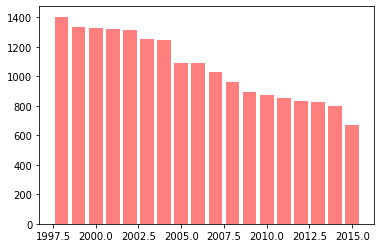

In [31]:
plt.bar(outbreaks_df["Year"].unique(), outbreaks_df["Year"].value_counts(), color='r', alpha=0.5, align="center")

In [32]:
plt.bar(outbreaks_df["Year"].unique(), outbreaks_df["Year"]["Species"].value_counts(), color='r', alpha=0.5, align="center")

KeyError: 'Species'

In [33]:
outbreaks_df["Food"].value_counts()

Multiple Foods                                                                                                                                              206
Oysters, Raw                                                                                                                                                165
Ground Beef, Hamburger                                                                                                                                      127
Salad, Unspecified                                                                                                                                          118
Chicken, Unspecified                                                                                                                                        105
                                                                                                                                                           ... 
Crabcake                                